In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Country-data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.isnull().sum().to_dict

<bound method Series.to_dict of country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64>

In [24]:
df.describe(percentiles=[0.2,0.4,0.6,0.75,0.78,0.8,0.82,0.85,0.88,.90,.92,0.95,0.98,0.99,0.999])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,3.479881e+06,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,1.604850e+07,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.063997e+01,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
20%,6.320000,3.435769e+03,55.060000,409.998800,2548.000000,1.408000,61.880000,1.630000,1146.000000
40%,15.280000,4.128181e+04,190.044600,1500.288000,7320.000000,3.700000,70.060000,2.144000,3262.000000
50%,19.300000,7.978500e+04,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
60%,29.160000,1.950641e+05,469.736800,2961.560000,14980.000000,6.964000,74.560000,2.670000,7334.000000
75%,62.100000,1.248926e+06,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
78%,63.648000,1.969937e+06,1027.776000,8333.516000,28300.000000,12.100000,77.848000,4.354400,19300.000000


<AxesSubplot:ylabel='Density'>

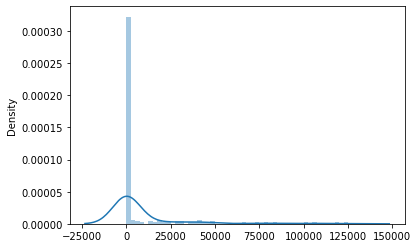

In [7]:
sns.distplot(df.describe(percentiles=[0.2,0.4,0.6,0.78,0.8,0.82,0.85,0.88,.90,.92,0.95,0.98,0.99,0.999]))

In [10]:
# convert export ,import and  health  into values

df['exports']=(df['exports']*df['gdpp'])/100

df['health']=(df['health']*df['gdpp'])/100

df['imports']=(df['imports']*df['gdpp'])/100

In [11]:
# pivot the country column to index

df.set_index('country', inplace=True)

In [12]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,305.809,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,46838.680,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,76383.744,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,77631.407,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,677222.000,735.6600,7185.800,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,41105.394,155.9250,1565.190,2950,2.62,63.0,3.50,2970
Venezuela,17.1,519412.500,662.8500,2376.000,16500,45.90,75.4,2.47,13500
Vietnam,23.3,12355.920,89.6040,1050.620,4490,12.10,73.1,1.95,1310


<Figure size 1080x1080 with 0 Axes>

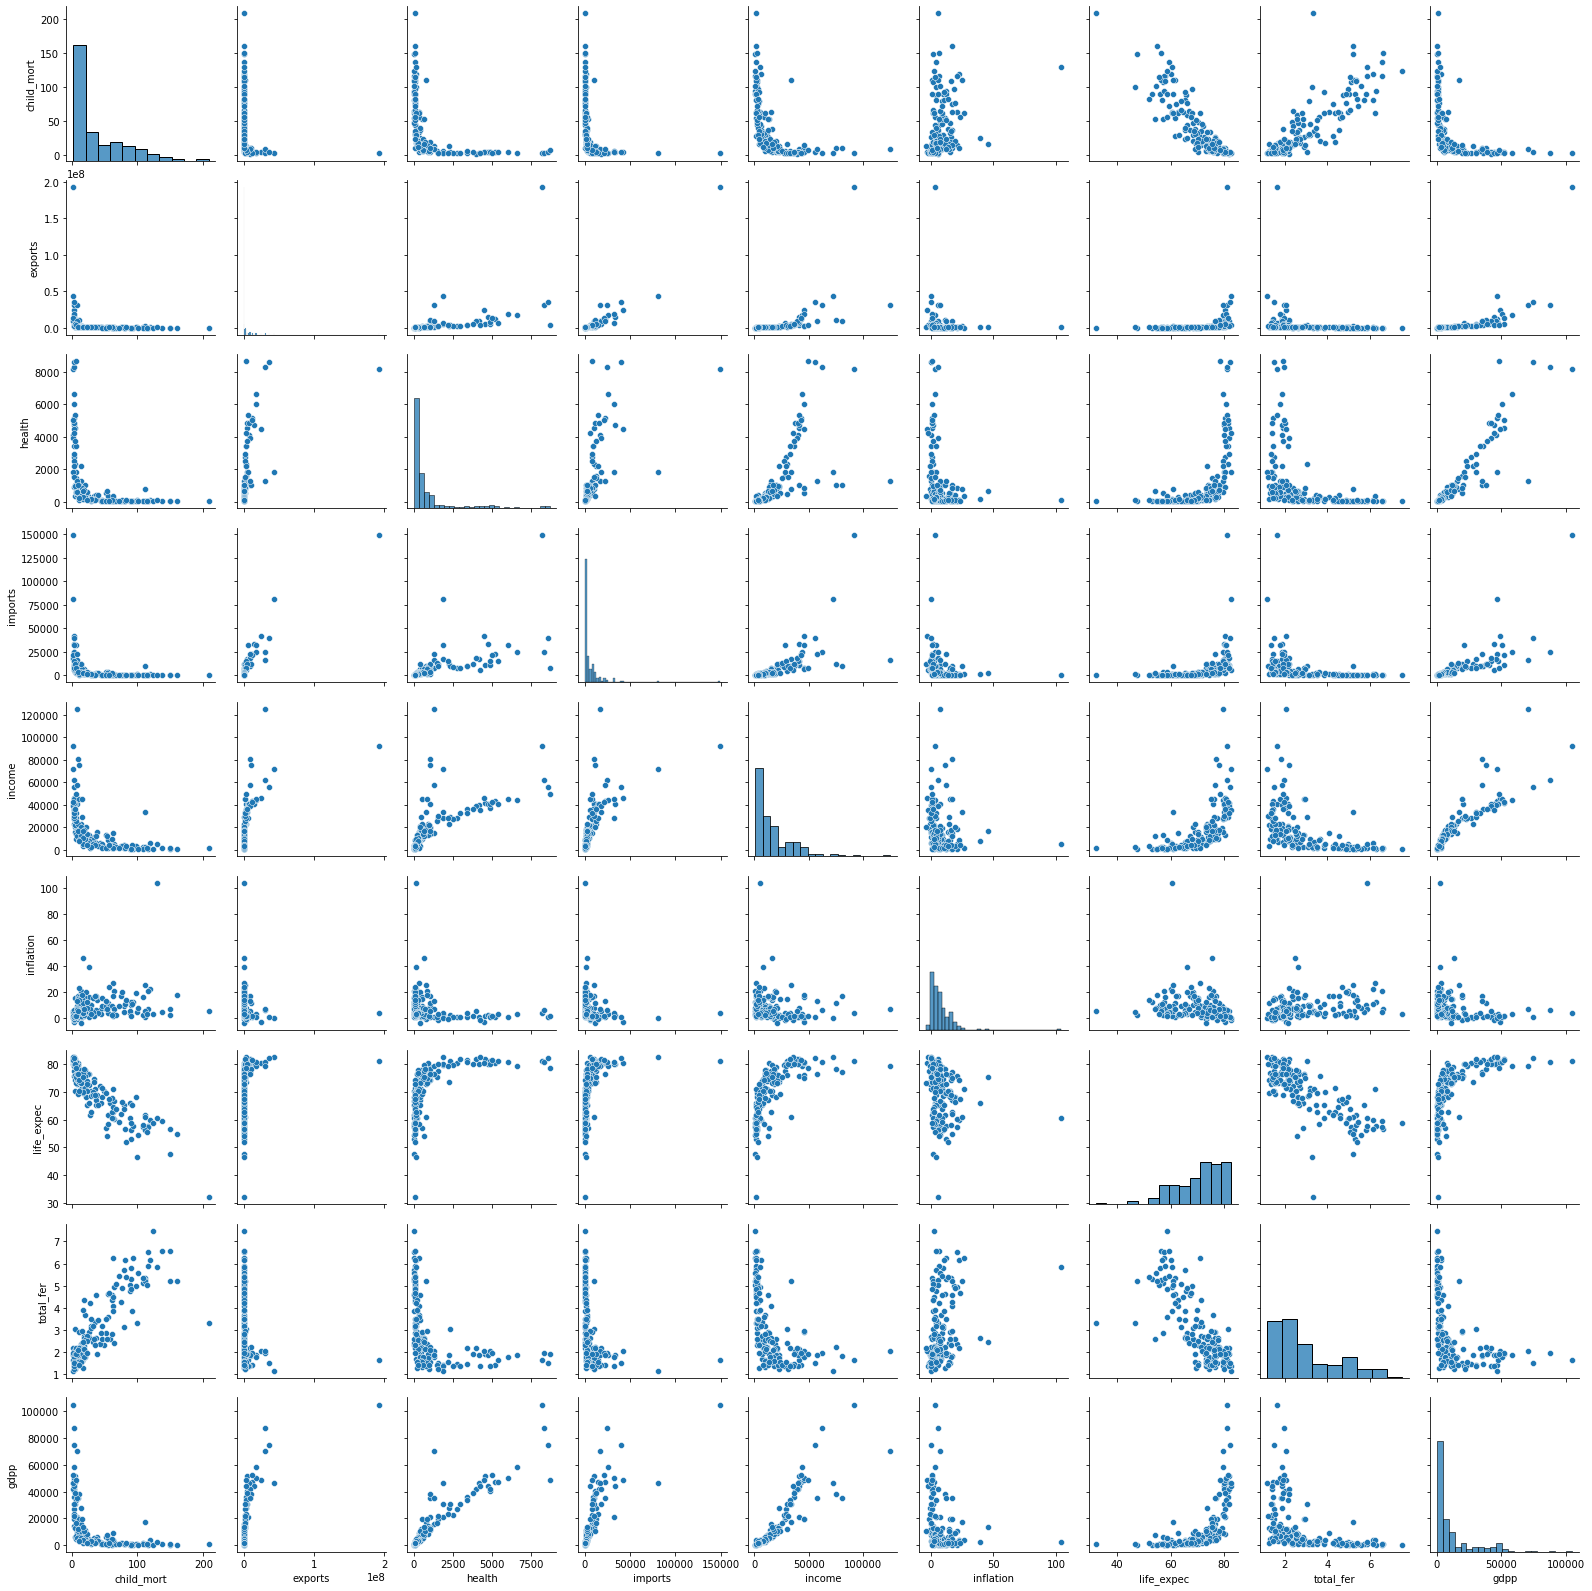

In [13]:
plt.figure(figsize=(15,15))
sns.pairplot(df)

<AxesSubplot:>

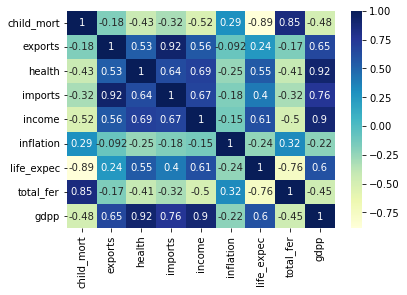

In [14]:
sns.heatmap(df.corr() ,annot = True, cmap="YlGnBu")

In [16]:
# scatter plot with 4 variables

def plotdata(data):
    color = data.life_expec
    area = 5e-2 * data.gdpp
    data.plot.scatter('child_mort','income',
                      s=area,c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=45, vmax=90,
                      linewidths=1,edgecolors='k',
                      figsize=(20,15))
    
    # labeling different cluster points with country names 
    for i, txt in enumerate(data.index):
        if txt == 'India':
            plt.annotate(txt, (data.child_mort[i],data.income[i]), fontsize=75, ha='left', rotation=25)
        plt.annotate(txt, (data.child_mort[i],data.income[i]), fontsize=10, ha='left', rotation=25)
    
    plt.title('Countries based on child_mort, income, gdpp and life_expec',fontsize=20)
    plt.xlabel('child_mort',  fontsize=20)
    plt.ylabel('income', fontsize=20)
    plt.tight_layout()    
    plt.show()

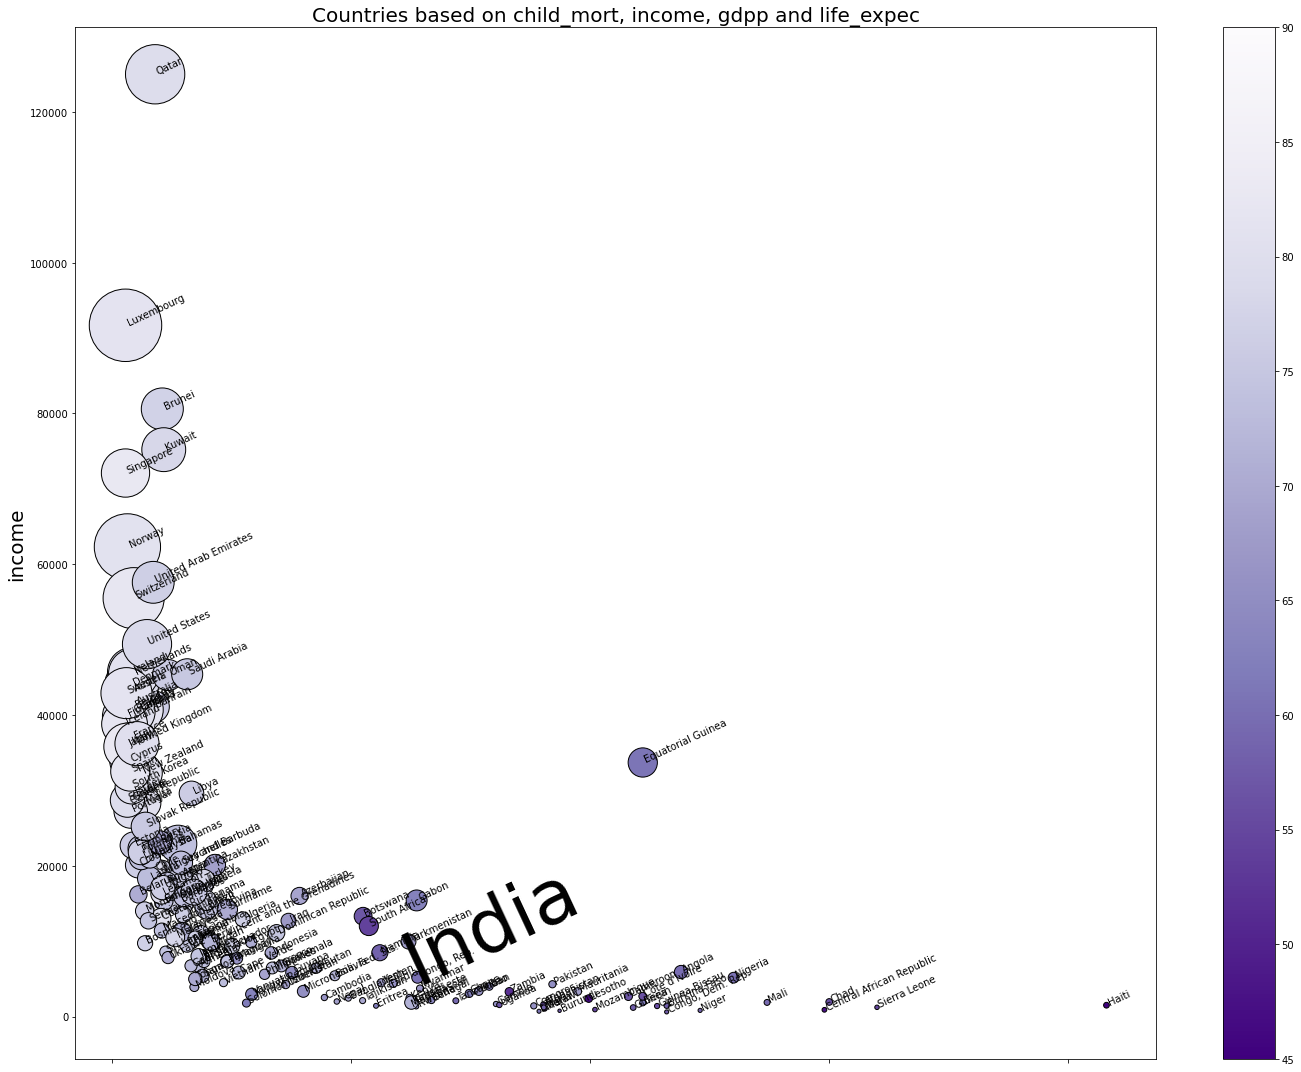

In [20]:
plotdata(df)

In [21]:
# india has moderate income 
#india has approx 65 life expentancy 

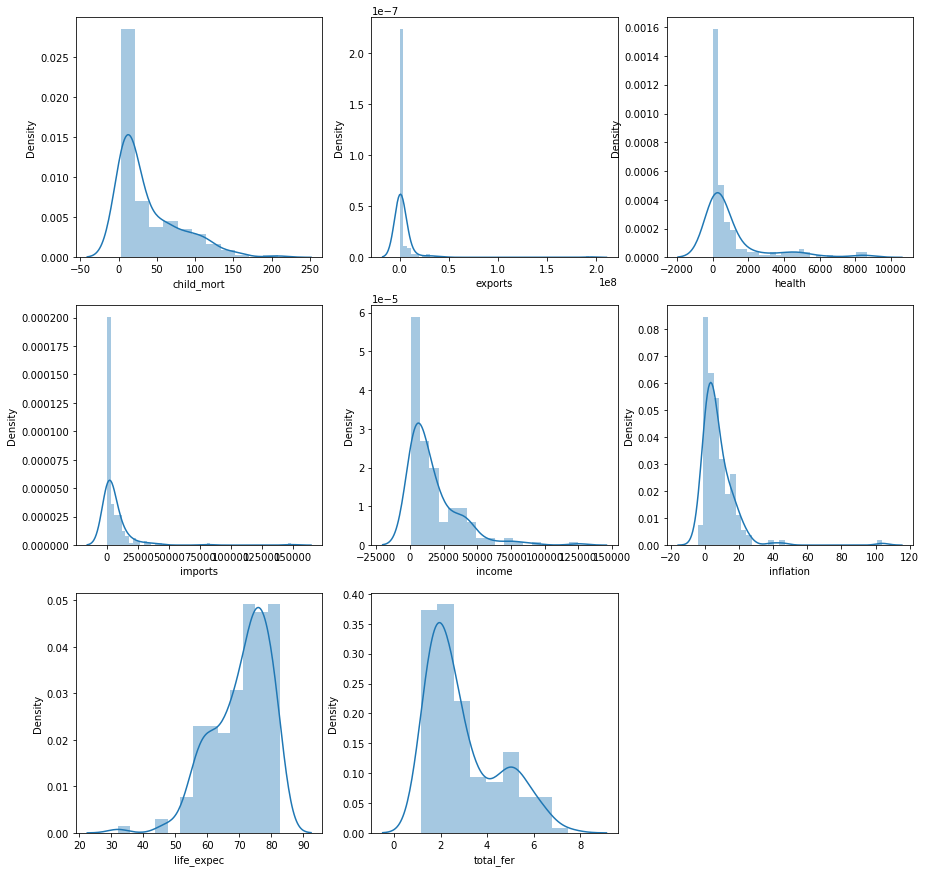

In [22]:
# distplot

# Distplot to see the distribution of the features
plt.figure(figsize = (15,15))
features = df.columns[:-1]
for i in enumerate(features):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

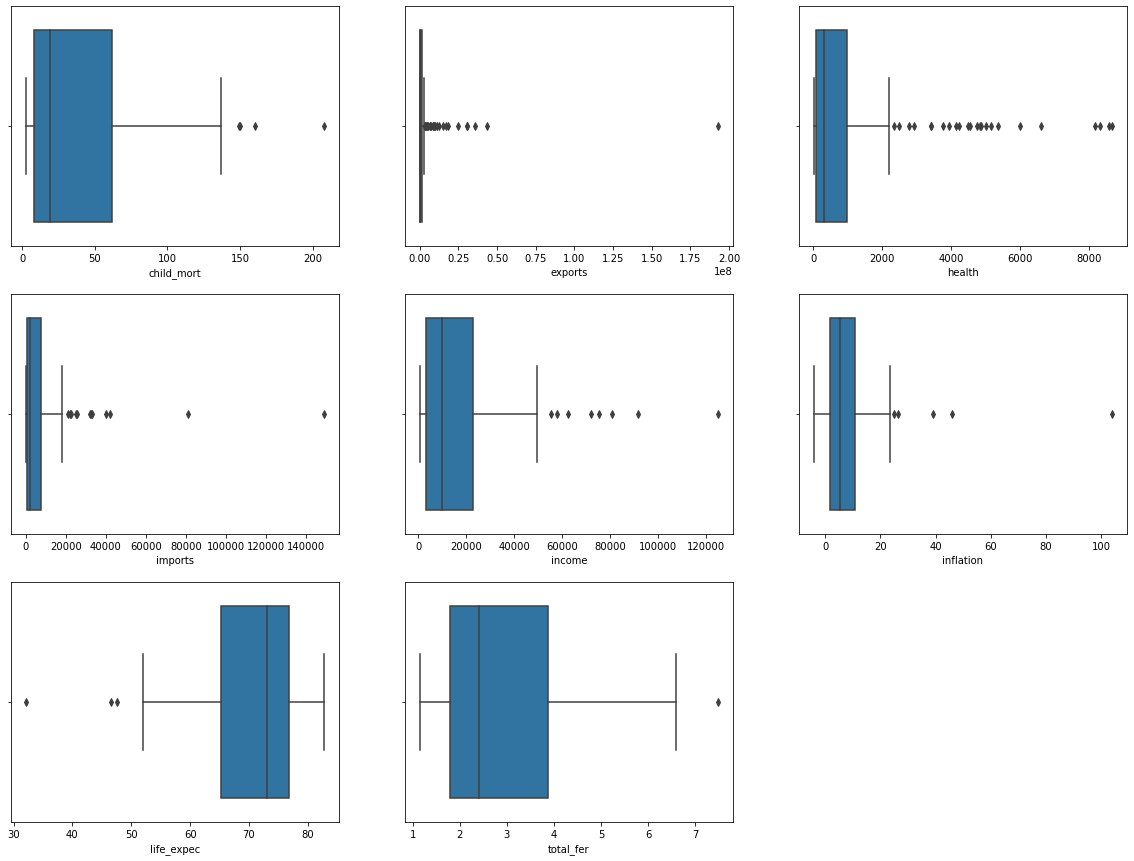

In [28]:
# Box plot to identify the outliers
plt.figure(figsize=(20, 15))
for i, x_var in enumerate(df.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = x_var, data = df)

In [29]:
# To find out the one outlier Country for the inflation feature. 
df.sort_values('inflation', ascending=False).head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Nigeria,130.0,1.373512e+04,118.1310,405.420,5150,104.0,60.5,5.84,2330
Venezuela,17.1,5.194125e+05,662.8500,2376.000,16500,45.9,75.4,2.47,13500
Mongolia,26.1,3.279508e+04,144.1600,1502.550,7710,39.2,66.2,2.64,2650
Timor-Leste,62.6,2.851200e+03,328.3200,1000.800,1850,26.5,71.1,6.23,3600
Equatorial Guinea,111.0,2.508878e+06,766.0800,10071.900,33700,24.9,60.9,5.21,17100
Yemen,56.3,5.148300e+03,67.8580,450.640,4480,23.6,67.5,4.67,1310
Sri Lanka,11.2,1.547636e+04,82.6140,753.080,8560,22.8,74.4,2.20,2810
Angola,119.0,7.763141e+04,100.6050,1514.370,5900,22.4,60.1,6.16,3530
Argentina,14.5,2.005101e+05,834.3000,1648.000,18700,20.9,75.8,2.37,10300


In [30]:
# Copy the original dataset to a different dataset to cap the Outliers. This is essential to keep the original dataset
df_capped = df.copy()
cap_outliers = ['exports', 'health', 'imports', 'income', 'gdpp', 'inflation']

In [32]:
# For each of the features in remove_outlier, cap the outliers in the upper end. 
# Only the outliers in the upper end need to be capped. 
for i, var in enumerate(cap_outliers):
    q4 = df[var].quantile(0.95)
    df_capped[var][df_capped[var]>=q4] = q4

df_capped.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,1.670000e+02,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,1.807256e+06,954.012480,5140.089474,15738.760479,6.929317,70.555689,2.947964,11998.826347
std,40.328931,3.773899e+06,1453.426636,6696.210005,14787.154215,6.384357,8.893172,1.513848,15158.213199
min,2.600000,1.063997e+01,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,5.715207e+03,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,7.978500e+04,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,1.248926e+06,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,1.430501e+07,4966.701000,24241.560000,48290.000000,20.870000,82.800000,7.490000,48610.000000


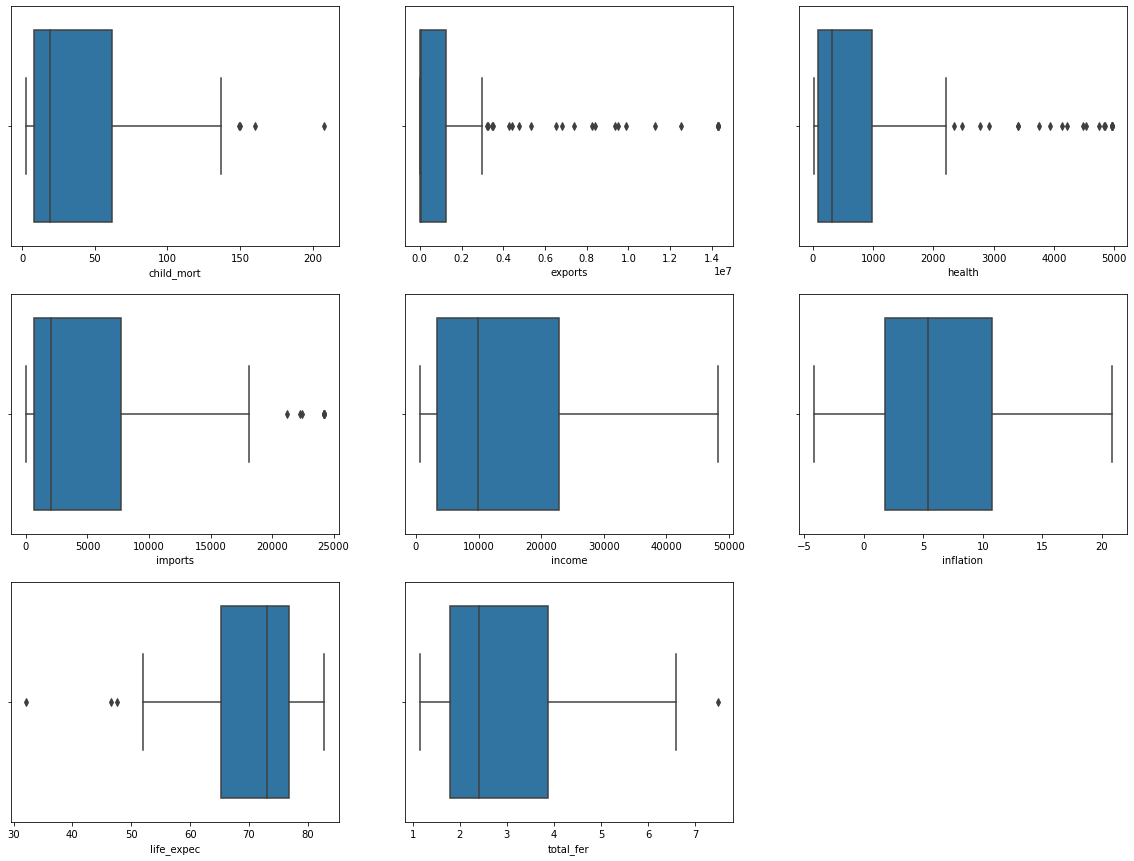

In [33]:
# Plot the boxplot for the features 
plt.figure(figsize=(20, 15))
for i, x_var in enumerate(df_capped.columns[:-1]):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = x_var, data = df_capped)

In [34]:
# Importing the scaling library - StandardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [35]:
# Scaling the dataset with Standard Scaler 
df_scaled=pd.DataFrame(scaler.fit_transform(df_capped),columns=df_capped.columns, index=df_capped.index)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-0.480242,-0.629435,-0.732729,-0.958349,0.394438,-1.619092,1.902882,-0.757362
Albania,-0.538949,-0.467875,-0.473489,-0.472182,-0.394006,-0.383226,0.647866,-0.859973,-0.523321
Algeria,-0.272833,-0.460022,-0.530017,-0.560152,-0.192552,1.440750,0.670423,-0.038404,-0.498838
Angola,2.007808,-0.459691,-0.588935,-0.543087,-0.667360,2.190136,-1.179234,2.128151,-0.560376
Antigua and Barbuda,-0.695634,-0.300335,-0.150685,0.306422,0.227992,-0.862393,0.704258,-0.541946,0.013312


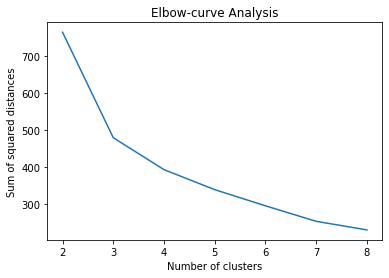

In [37]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters starting from 2 clusters
xi = list(range(len(range_n_clusters)))
plt.plot(xi, ssd) 
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances') 
plt.xticks(xi, range_n_clusters)
plt.title('Elbow-curve Analysis')
plt.show()


In [38]:
def plotdata_cluster(data, title):
    area = 5e-2 * data.gdpp
    colors = data.cluster_id.map({0: 'skyblue', 1: 'gold', 2: 'coral', 3: 'palegreen'})
    
    data.plot.scatter('child_mort','income',
                      s=area, c=colors,
                      linewidths=1,edgecolors='k',
                      figsize=(20,15))
        
    # labeling different cluster points with country names 
    for i, txt in enumerate(data.index):
        if txt == 'India':
            plt.annotate(txt, (data.child_mort[i],data.income[i]), fontsize=25, ha='left', rotation=25)
        plt.annotate(txt, (data.child_mort[i],data.income[i]), fontsize=12, ha='left', rotation=25)
    
    #plt.title('Countries clusters based on child_mort, income and gdpp after Outlier removal',fontsize=20)
    plt.title(plot_title,fontsize=20)
    plt.xlabel('child_mort',  fontsize=20)
    plt.ylabel('income', fontsize=20)
    plt.tight_layout()

In [39]:
def plotdata_health(data, plot_title):
    area = 50e-1 * data.health
    colors = data.cluster_id.map({0: 'skyblue', 1: 'gold', 2: 'coral', 3: 'palegreen'})
    
    data.plot.scatter('child_mort','life_expec',
                      s=area, c=colors,
                      linewidths=1,edgecolors='k',
                      figsize=(20,15))
        
    # labeling different cluster points with country names 
    for i, txt in enumerate(data.index):
        if txt == 'India':
            plt.annotate(txt, (data.child_mort[i],data.life_expec[i]), fontsize=25, ha='left', rotation=25)
        plt.annotate(txt, (data.child_mort[i],data.life_expec[i]), fontsize=12, ha='left', rotation=25)
    
    #plt.title('Countries clusters based on child_mort, life_expec and health expenditure',fontsize=20)
    plt.title(plot_title,fontsize=20)
    plt.xlabel('child_mort',  fontsize=20)
    plt.ylabel('life_expec', fontsize=20)
    plt.tight_layout()

In [40]:
kmeans_3=KMeans(n_clusters=3, max_iter=100, random_state=50)    # k=3 and iteration=100
kmeans_3.fit(df_scaled)    

KMeans(max_iter=100, n_clusters=3, random_state=50)

In [41]:
kmeans_3.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0], dtype=int32)

In [42]:
# Appending the cluster labels to the original capped dataset 
df_cap_kmeans3 = df_capped.copy()
df_cap_kmeans3['cluster_id']=kmeans_3.labels_
#df_cap_kmeans3.head()

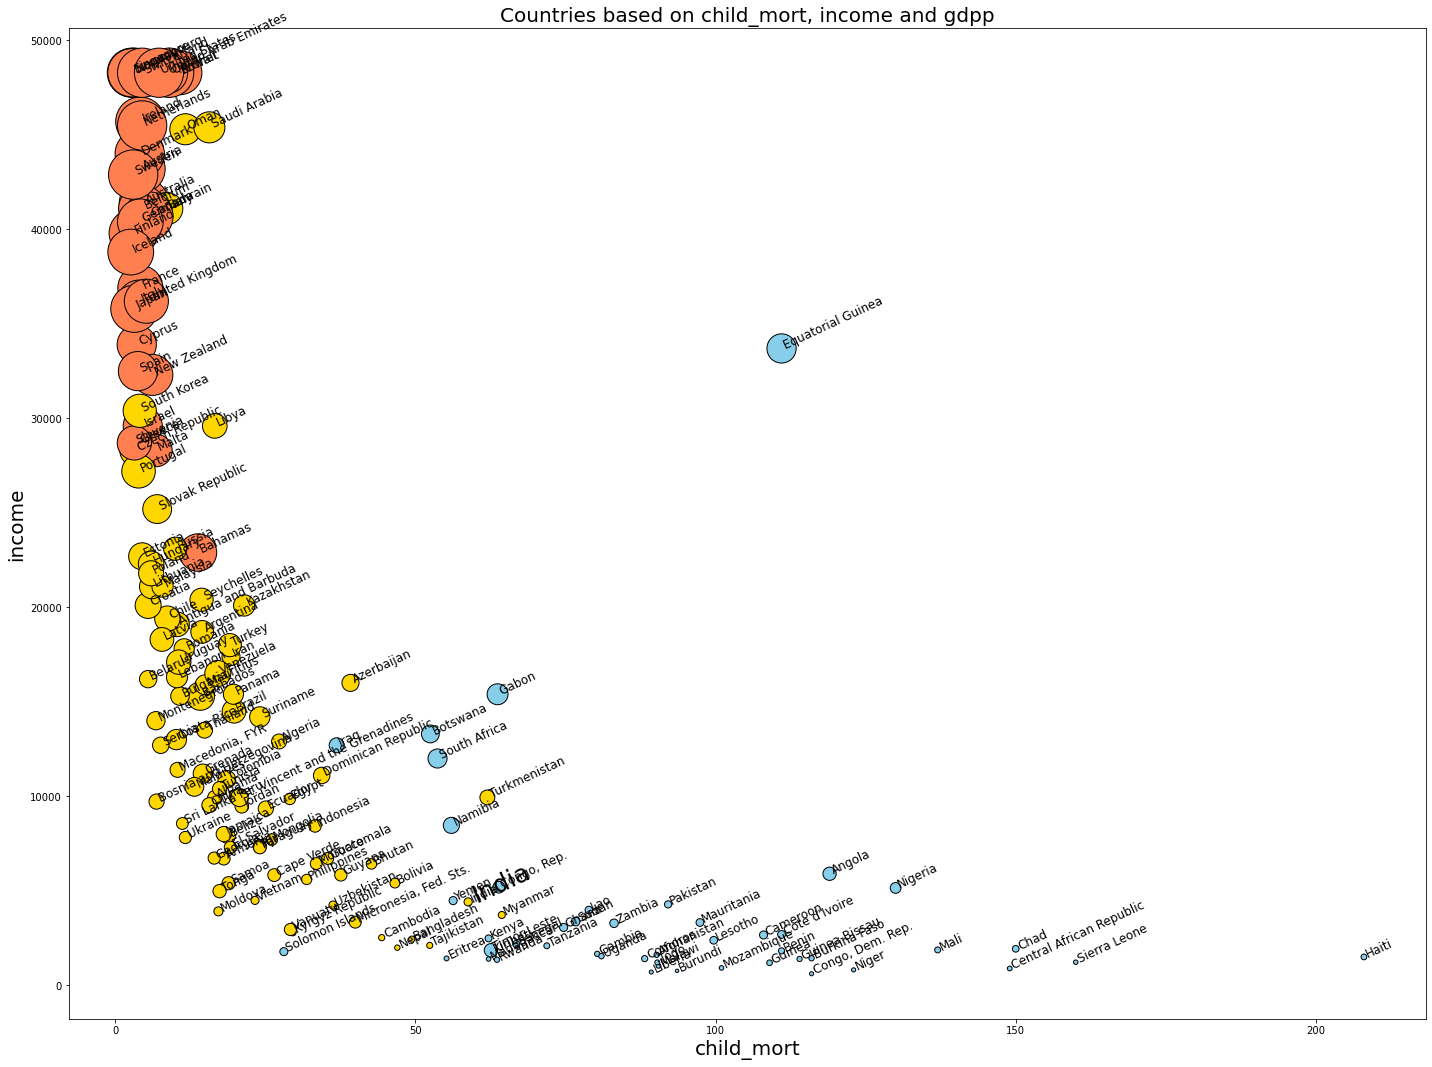

In [44]:
# Plot the scatter plot of countries for Kmeans clustering with 3 clusters
# child_mort along the x axis, income along the y-axis and size of the scatter point relative to the gdpp 
plot_title = 'Countries based on child_mort, income and gdpp'
plotdata_cluster(df_cap_kmeans3, plot_title)

In [45]:
# Final model: K Means clustering with k=4
kmeans_4=KMeans(n_clusters=4, max_iter=100, random_state=50)    # k=4 and iteration=500
kmeans_4.fit(df_scaled) # fitting the dataset

KMeans(max_iter=100, n_clusters=4, random_state=50)

In [46]:
kmeans_4.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 3, 1, 0, 0, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 3, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       3, 1, 1, 1, 1, 2, 2, 1, 1, 3, 0, 2, 2, 1, 3, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 3, 1, 1, 1, 2, 3, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 3, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       3, 0, 2, 2, 3, 0, 2, 1, 1, 1, 1, 1, 0, 3, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 3, 0, 0, 2, 1, 0, 0, 1, 1, 2, 1, 3, 3, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2], dtype=int32)

In [48]:
# Appending the cluster labels to the original capped dataset  
df_cap_kmeans4 = df_capped.copy()
df_cap_kmeans4['cluster_id']=kmeans_4.labels_

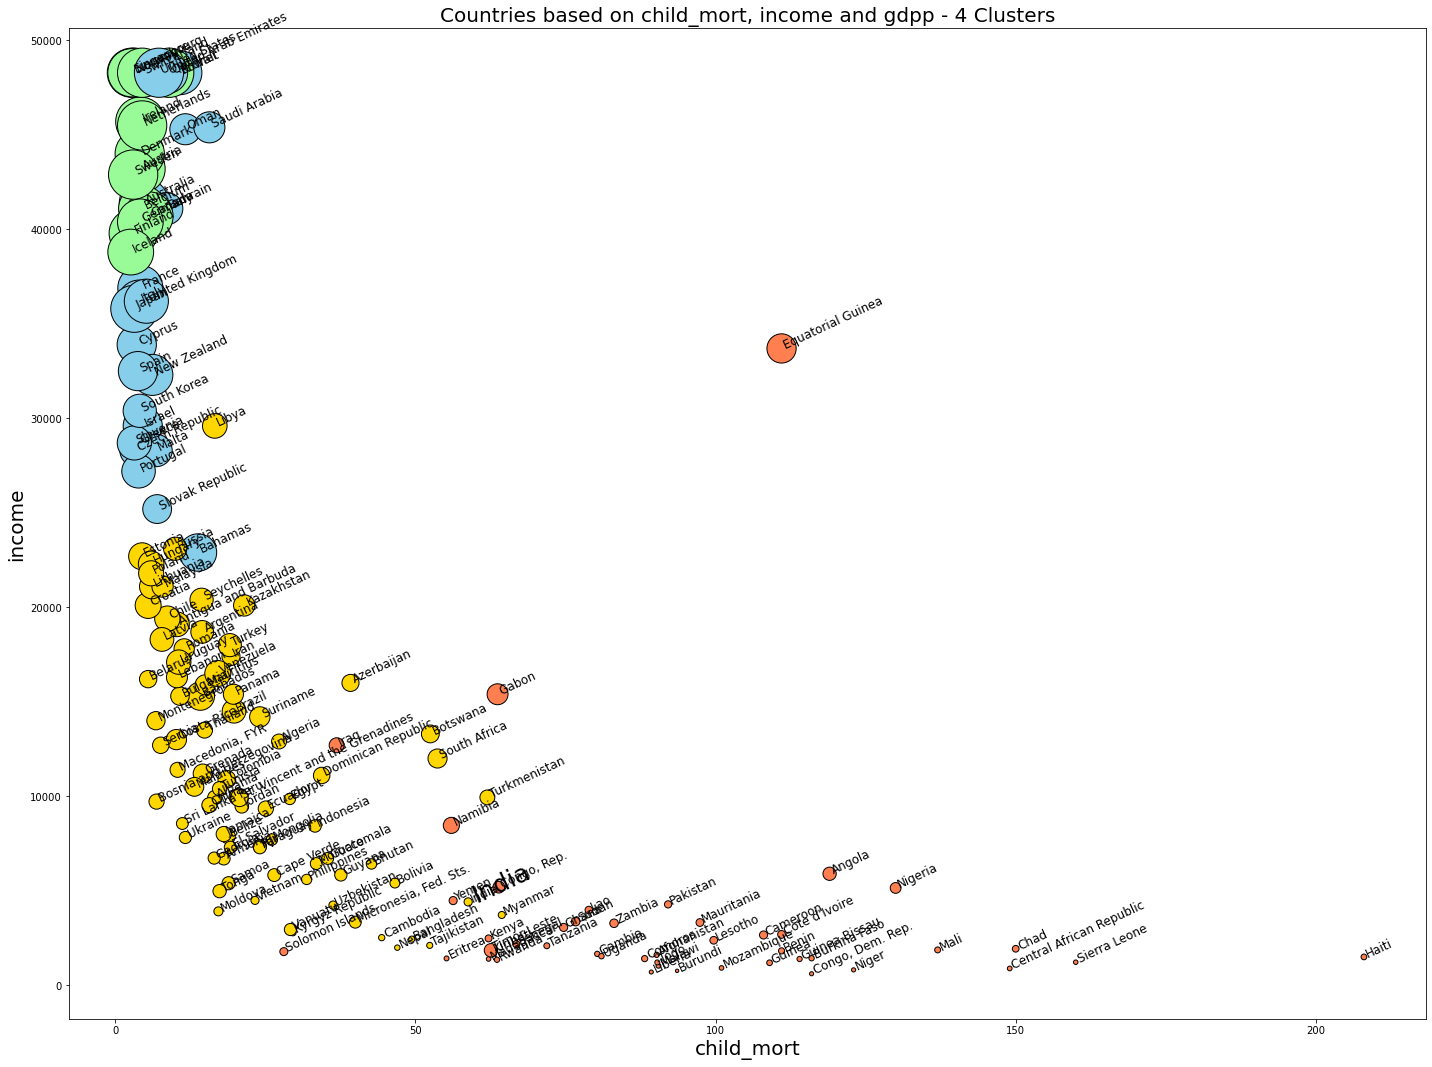

In [49]:
# Plot the scatter plot of countries for Kmeans clustering with 3 clusters
# child_mort along the x axis, income along the y-axis and size of the scatter point relative to the gdpp 
plot_title = 'Countries based on child_mort, income and gdpp - 4 Clusters'
plotdata_cluster(df_cap_kmeans4, plot_title)


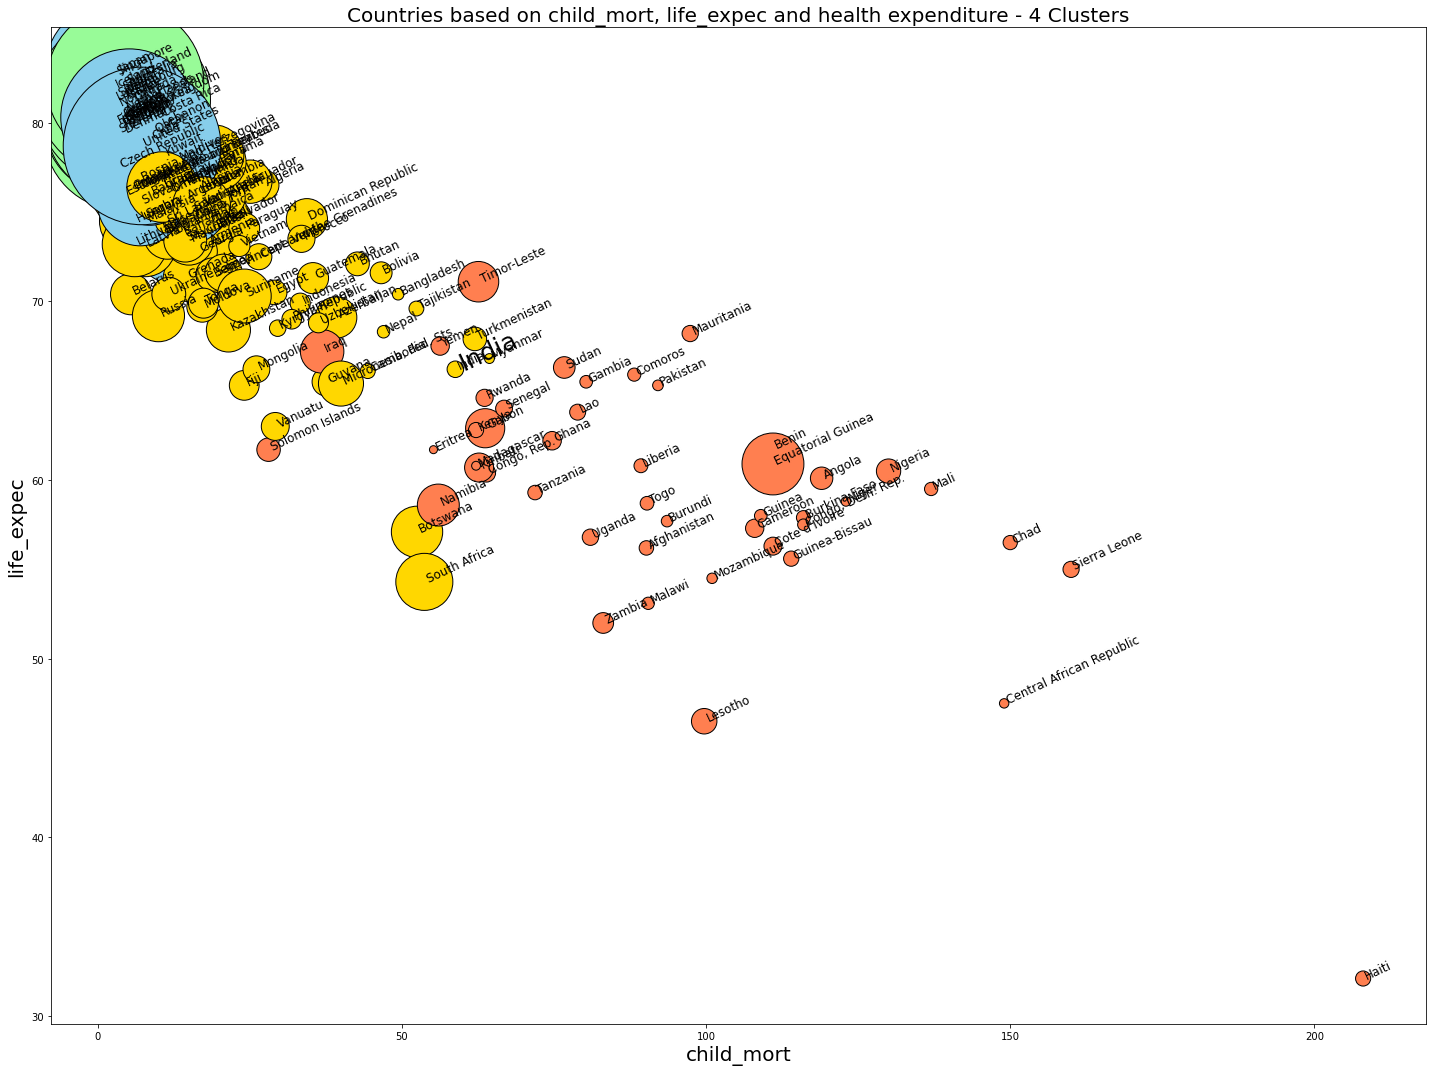

In [50]:
# This function is to plot the scatter plot of countries based on child_mort, life_expec and health (expenditure). 
# The child_mort is along the x-axis, life_expec along the y-axis and the size of the points relational to the health.

plot_title = 'Countries based on child_mort, life_expec and health expenditure - 4 Clusters'
plotdata_health(df_cap_kmeans4, plot_title)

# Snake plots to understand and compare segments

In [52]:
# Define a function to create the snake plots for segment analysis
def snake_plot(data, plot_title):
    sns.set_style('whitegrid')
    df_melt = pd.melt(data.reset_index(), id_vars = ['country','cluster_id'], 
                      var_name = 'Feature', value_name = 'Value')

    plt.figure(figsize = (12,6))
    sns.lineplot(x = 'Feature', y = 'Value', data = df_melt,
                 hue = 'cluster_id', palette = "muted")
    
    plt.title(plot_title,fontsize=20)
    plt.xlabel('Features',  fontsize=20)
    plt.ylabel('Scaled Values', fontsize=20)
    plt.tight_layout()    
    
    # To print the number of Countries falling under each clusters
    print (title)
    print (df_sp.cluster_id.value_counts())

In [53]:
# Create Dataset for Snake plots - Scaled dataset should be used for the snake plot
df_sp = df_scaled.copy()

Segment Analysis - KMeans with 3 clusters
1    87
0    48
2    32
Name: cluster_id, dtype: int64


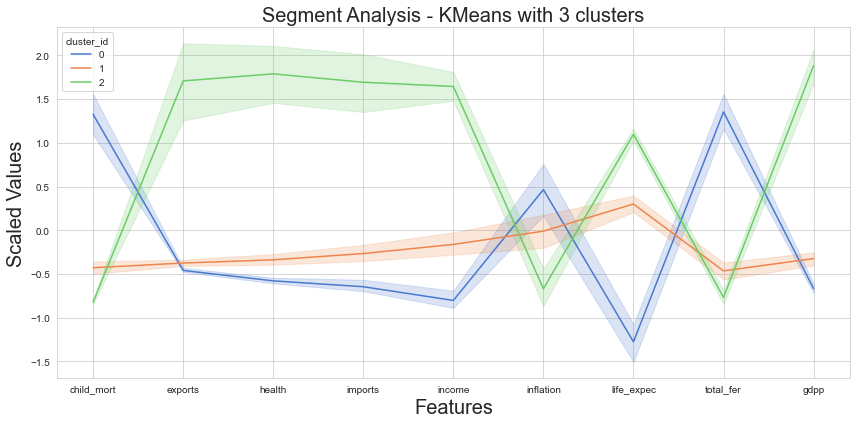

In [54]:
# Use the labels from the KMeans clustering with 3 clusters for snake plot
df_sp['cluster_id'] = kmeans_3.labels_ 

# snake plot for 3 clusters
title = 'Segment Analysis - KMeans with 3 clusters'
snake_plot(df_sp, title)

In [ ]:
# green cluster has better exp ,imp ,health ,income kind of better
# blue has poor exports and imports
# orange has balanced


# Hierarchical Clustering

In [56]:
# Plot the Hierarchical Clustering Dendrogram for Single linkage
def plot_dendrogram_single(data):
    plt.figure(figsize=(15,8))             # Setting the size of the figure
    sns.set_style('white')                  # Setting style

    # setting the labels on axes and title
    plt.title('Hierarchical Clustering Dendrogram - Single linkage',fontsize=20)
    plt.xlabel('Country',fontsize=20)
    plt.ylabel('Values',fontsize=20)

    mergings_s = linkage(data, method = "single", metric='euclidean') # Use the df_scaled dataset
    dendrogram(mergings_s, labels=data.index, leaf_rotation=90, leaf_font_size=6)
    plt.show()
    return mergings_s


In [57]:
# Plot the Hierarchical Clustering Dendrogram for Complete linkage
def plot_dendrogram_complete(data):
    plt.figure(figsize=(15,8))             # Setting the size of the figure
    sns.set_style('white')                  # Setting style

    # setting the labels on axes and title
    plt.title('Hierarchical Clustering Dendrogram - Complete linkage',fontsize=20)
    plt.xlabel('Country',fontsize=20)
    plt.ylabel('Values',fontsize=20)

    mergings_c = linkage(data, method = "complete", metric='euclidean')
    dendrogram(mergings_c, labels=data.index, leaf_rotation=90, leaf_font_size=6)
    plt.show()
    return mergings_c

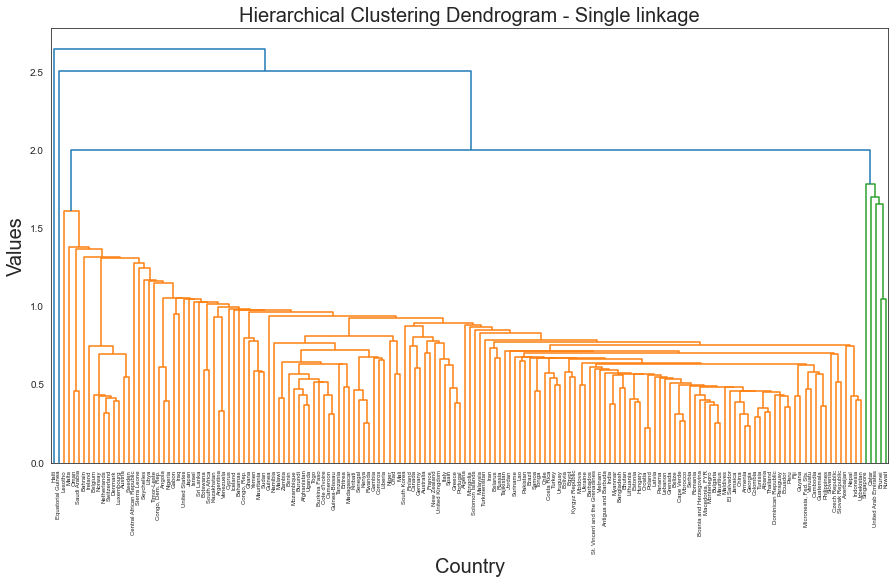

In [58]:
# Plot the dendrogram for the normalized dataset with single linkage
mergings_s = plot_dendrogram_single(df_scaled)

In [59]:
cap_outliers

['exports', 'health', 'imports', 'income', 'gdpp', 'inflation']

In [60]:
df_capped1 = df.copy()

for i, var in enumerate(cap_outliers):
    q1 = df[var].quantile(0.05)
    q4 = df[var].quantile(0.95)
    df_capped1[var][df_capped1[var]<=q1] = q1
    df_capped1[var][df_capped1[var]>=q4] = q4

df_scaled1=pd.DataFrame(scaler.fit_transform(df_capped1),columns=df_capped1.columns, index=df_capped1.index)
df_scaled1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-0.480233,-0.629778,-0.733291,-0.960575,0.387667,-1.619092,1.902882,-0.757874
Albania,-0.538949,-0.467877,-0.473807,-0.472674,-0.395590,-0.404004,0.647866,-0.859973,-0.523775
Algeria,-0.272833,-0.460025,-0.530344,-0.560668,-0.193907,1.452825,0.670423,-0.038404,-0.499286
Angola,2.007808,-0.459693,-0.589272,-0.543598,-0.669255,2.215708,-1.179234,2.128151,-0.560839
Antigua and Barbuda,-0.695634,-0.300337,-0.150953,0.306143,0.227115,-0.891802,0.704258,-0.541946,0.012991


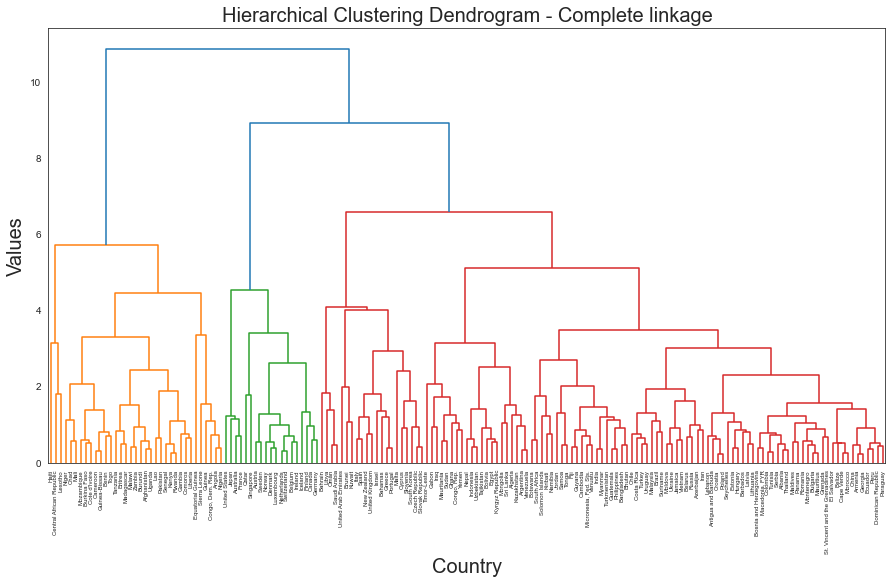

In [61]:
mergings_cc = plot_dendrogram_complete(df_scaled1)

In [62]:
# 3 clusters - use the mergings from Complete linkage
cluster_labels_3 = cut_tree(mergings_cc, n_clusters=3).reshape(-1, )
cluster_labels_3

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0])

In [65]:
# To visualise let us use the df_capped1 dataset with the Outliers capped for upper outliers and lower outliers 
df_cap_hier3 = df_capped1.copy()

# assign cluster labels
df_cap_hier3['cluster_id'] = cluster_labels_3
df_cap_hier3.head(10)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
country,,,,,,,,,,
Afghanistan,90.2,3.491300e+02,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
Albania,16.6,4.683868e+04,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,1
Algeria,27.3,7.638374e+04,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,1
Angola,119.0,7.763141e+04,100.6050,1514.370,5900.0,20.870,60.1,6.16,3530.0,0
Antigua and Barbuda,10.3,6.772220e+05,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200.0,1
Argentina,14.5,2.005101e+05,834.3000,1648.000,18700.0,20.870,75.8,2.37,10300.0,1
Armenia,18.1,2.156627e+04,141.6800,1458.660,6700.0,7.770,73.3,1.69,3220.0,1
Australia,4.8,5.333348e+06,4530.8700,10847.100,41400.0,1.160,82.0,1.93,48610.0,2
Austria,4.3,1.128400e+07,4966.7010,22418.200,43200.0,0.873,80.5,1.44,46900.0,2


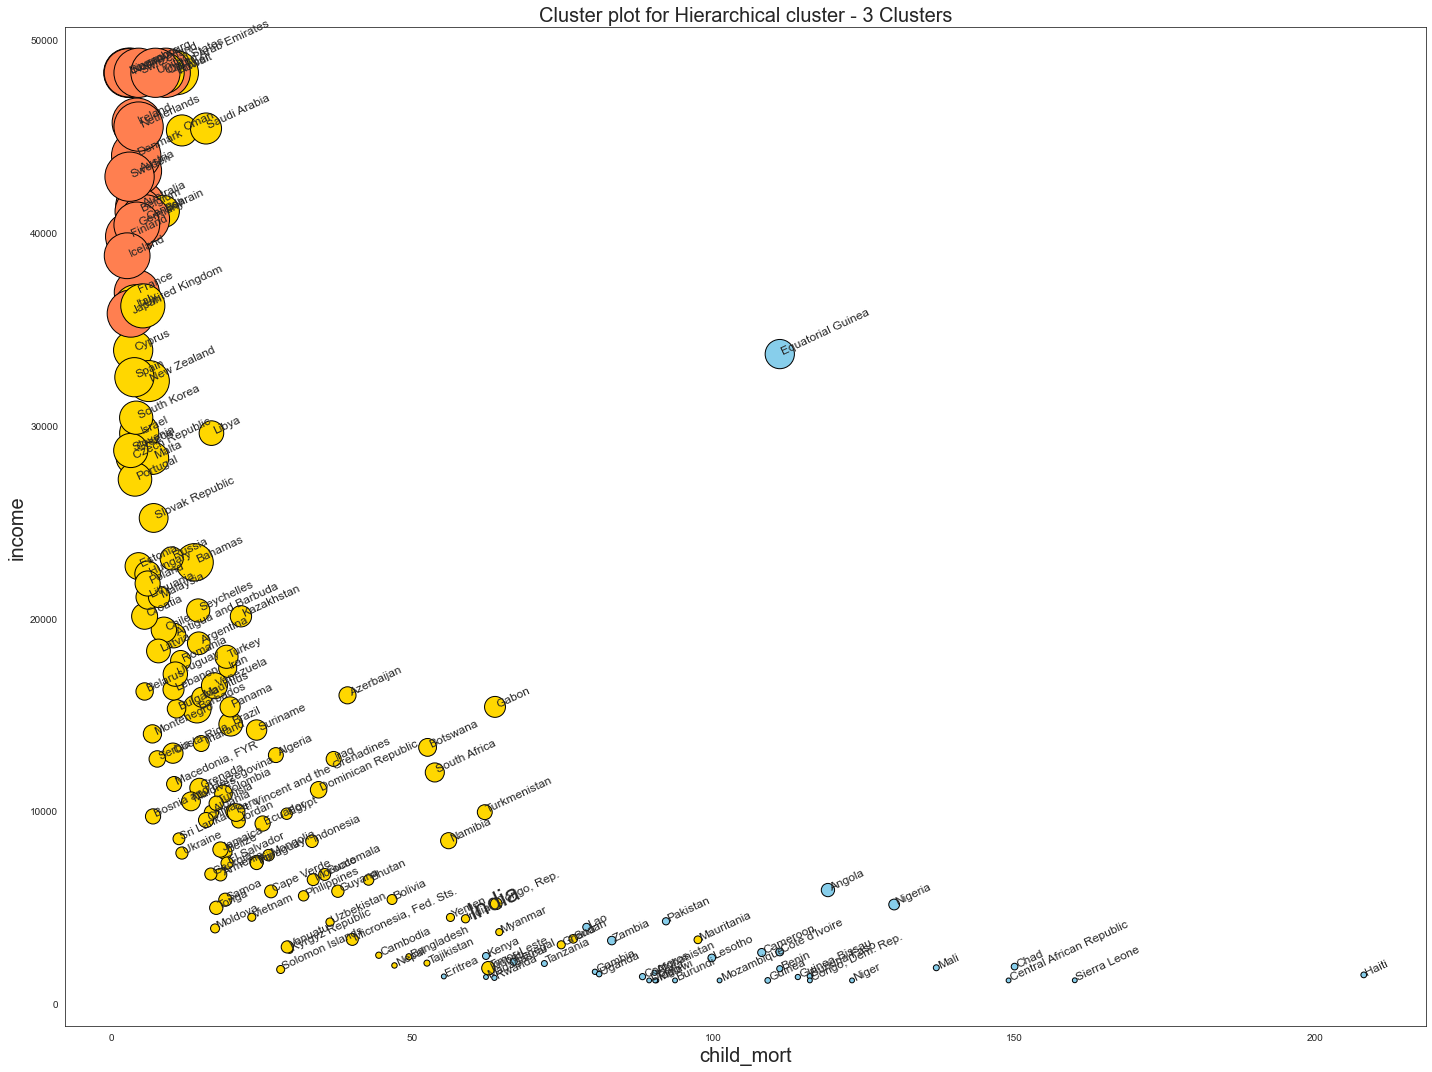

In [66]:
# Cluster plot for Hierarchical cluster - 3 Clusters
plot_title = 'Cluster plot for Hierarchical cluster - 3 Clusters'
plotdata_cluster(df_cap_hier3, plot_title)

 # Snake plots to analyze segments

Segment Analysis - Hierarchical with 3 clusters
1    113
0     35
2     19
Name: cluster_id, dtype: int64


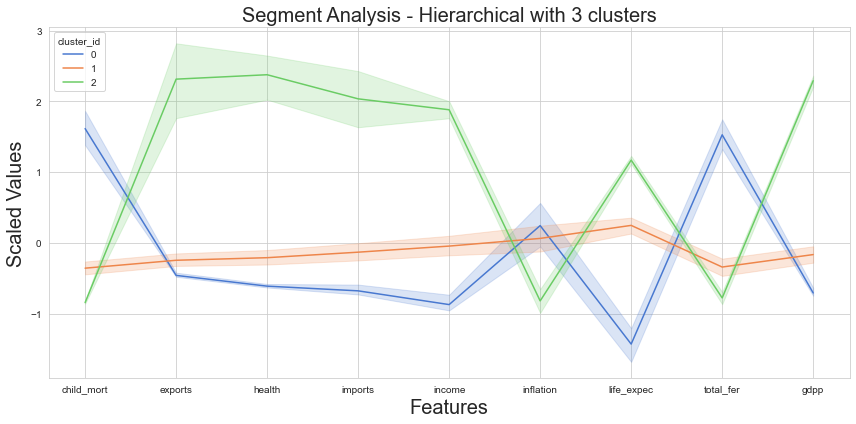

In [68]:
# Snake plot for Hierarchical clustering with 3 clusters 
# Use the labels from the Hierarchical clustering with 3 clusters for snake plot
df_sp['cluster_id'] = cluster_labels_3

# snake plot for 3 clusters
title = 'Segment Analysis - Hierarchical with 3 clusters'
snake_plot(df_sp, title)

In [69]:
# Snake plot for Hierarchical clustering with 4 clusters 
# Use the labels from the Hierarchical clustering with 4 clusters for snake plot
df_sp['cluster_id'] = cluster_labels_4

# snake plot for 3 clusters
title = 'Segment Analysis - Hierarchical with 4 clusters'
snake_plot(df_sp, title)

NameError: name 'cluster_labels_4' is not defined